In [43]:
# 📌 Import required libraries
import numpy as np              # For numerical computations
import matplotlib.pylab as plt  # For plotting graphs


# 📌 Generate a sequence of x-values
# linspace(start, end, number_of_points) generates 100 evenly spaced values from -5 to +5
# This gives us a smooth set of x-coordinates to plot a curve.
x = np.linspace(-5.0, 5.0, 100)


# 📌 Compute corresponding y values using the equation of a circle:
#     x² + y² = r²
# Here the radius r = 10 → so: y = sqrt(100 - x²)
#
# Why this works:
#   For every x value, sqrt(100 - x²) gives the y position on the **upper semicircle**
y = np.sqrt(10**2 - x**2)


# 📌 Duplicate y values to include the lower semicircle as well
# The negative part (−y) completes the circle because:
#   Upper semicircle → + sqrt(...)
#   Lower semicircle → - sqrt(...)
#
# hstack stacks arrays horizontally.
# After this line, y contains both positive and negative branch values:
# e.g., [+y0, +y1, ..., +y99, -y0, -y1, ..., -y99]
y = np.hstack([y, -y])


# 📌 Duplicate x values so they match y array length
# We need x and y to be of SAME length to plot.
# First half of y corresponds to original x (upper semicircle)
# Second half corresponds to same x values (lower semicircle)
x = np.hstack([x, -x])


In [44]:
# 📌 Generate x-coordinates between -5 and +5
# linspace(start, end, number_of_points) produces 100 evenly spaced values.
# These values will be used to construct a circular shape.
x1 = np.linspace(-5.0, 5.0, 100)


# 📌 Compute y-coordinates using the equation of a circle:
#       x² + y² = r²
# Here, radius r = 5 → so:  y = sqrt(25 − x²)
#
# For every x-value between −5 and +5, we calculate the corresponding y value
# on the **upper semicircle** (positive branch of sqrt).
y1 = np.sqrt(5**2 - x1**2)


# 📌 Add the lower semicircle
#   Upper semicircle = + sqrt(25 − x²)
#   Lower semicircle = − sqrt(25 − x²)
#
# hstack joins arrays horizontally, so now y1 contains:
#   [ +y0, +y1, ... +y99,  −y0, −y1, ... −y99 ]
y1 = np.hstack([y1, -y1])


# 📌 Duplicate x-coordinates to match up with y1
# The first half of x1 corresponds to the upper semicircle
# The second half corresponds to the same x-values for the lower semicircle.
x1 = np.hstack([x1, -x1])


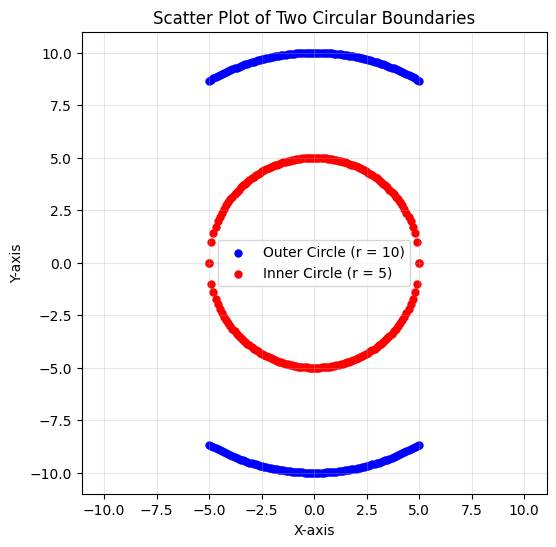

In [45]:
# 📌 Plot two circles using scatter plot

plt.figure(figsize=(6, 6))  # Square plotting window for a proper circle shape

# 🔵 Outer circle (radius 10)
plt.scatter(
    x, y, 
    s=25,              # size of points
    c='blue',          # color of points
    label='Outer Circle (r = 10)'
)

# 🔴 Inner circle (radius 5)
plt.scatter(
    x1, y1,
    s=25,
    c='red',
    label='Inner Circle (r = 5)'
)

# 📌 Plot formatting
plt.title("Scatter Plot of Two Circular Boundaries")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')      # Ensures circles are not stretched (1:1 aspect ratio)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [46]:
import pandas as pd

# 📌 Create a DataFrame for the **outer circle**
# np.vstack([y, x]) stacks y and x vertically:
#     Row 1 → y values
#     Row 2 → x values
# .T (transpose) flips rows → columns, giving shape: (n_samples , 2)
#
# So the first column becomes X1 and the second column becomes X2.
df1 = pd.DataFrame(
    np.vstack([y, x]).T,
    columns=['X1', 'X2']     # rename columns for clarity
)

# Add the label/target column for classification
# Here we assign `0` meaning: this point belongs to **outer circle class**
df1['Y'] = 0



# 📌 Create a DataFrame for the **inner circle**
# Same logic as above — we stack (y1, x1) and convert to DataFrame.
df2 = pd.DataFrame(
    np.vstack([y1, x1]).T,
    columns=['X1', 'X2']
)

# Label these points as another class
# Here we assign `1` to represent the **inner circle class**
df2['Y'] = 1



# 📌 Combine both circles into one unified dataset
# pd.concat merges two DataFrames row-wise into a single table.
# ignore_index=True resets the index so numbering runs continuously.
df = pd.concat([df1, df2], ignore_index=True)

# Display the first 5 rows of the final dataset
display(df.head(5))


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [47]:
# 📌 Independent and dependent features selection

# df contains 3 columns → ['X1', 'Y1', 'Y']
#   X1 and Y1 are the input features (coordinates of each point)
#   Y is the target/class label (0 = outer circle, 1 = inner circle)

# 🔹 Independent variables (features used for prediction)
# iloc[:, :2] → selects all rows and the first two columns only (X1 and Y1)
# These two numerical columns represent the input to the SVM model.
X = df.iloc[:, :2]


# 🔹 Dependent variable (target we want to predict)
# y contains 0 or 1 depending on whether the sample belongs to the outer or inner circle.
# This is what the machine learning model will try to classify.
y = df.Y


In [48]:
# 📌 Splitting the dataset into TRAIN and TEST sets
from sklearn.model_selection import train_test_split

# train_test_split divides the dataset into:
#   🔹 Training set  → used to teach the model patterns in the data
#   🔹 Test set      → used to evaluate how well the model generalizes to unseen data
#
# Parameters used:
#   X  → input features (X1 and Y1 coordinates)
#   y  → target labels (0 = outer circle, 1 = inner circle)
#   test_size = 0.25  → 25% of the data goes to test set, 75% to training
#                     (since data quantity is small, splitting equally helps in stable evaluation)
#   random_state = 0 → ensures the split is ALWAYS the same each time the code runs
#                       (important for reproducibility in ML experiments)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
)


## Polynomial Kernal

$$
K(x,y) = (x^T y + x)^d

$$

In [49]:
## 🎯 Creating polynomial feature components manually (for learning purpose)

# Polynomial kernel basically expands the input features into higher-degree combinations.
# For 2-dimensional input (X1, X2), a 2nd-degree polynomial kernel generates:
#   X1        → original feature
#   X2        → original feature
#   X1²       → squared term
#   X2²       → squared term
#   X1 × X2   → interaction term
#
# Adding these features helps us visualize why the polynomial kernel can separate
# data that a linear kernel cannot.

df['X1_Square'] = df['X1'] ** 2        # X1² → square of first feature
df['X2_Square'] = df['X2'] ** 2        # X2² → square of second feature
df['X1*X2'] = df['X1'] * df['X2']      # Interaction between X1 and X2 (cross term)

display(df.head())


,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [50]:
## 🎯 Independent and dependent features

# We now select the input features (X) and the target/output variable (y)
# for training an ML model.

# 📌 Independent Variables (Feature Matrix)
# We are using 5 columns:
#   🔹 X1          → original feature 1 (x-coordinate)
#   🔹 X2          → original feature 2 (y-coordinate)
#   🔹 X1_Square   → X1² term
#   🔹 X2_Square   → X2² term
#   🔹 X1*X2       → interaction term between X1 and X2
#
# These additional polynomial components help make the data linearly separable
# in higher-dimensional space — this is exactly what a polynomial kernel does internally.
X = df[['X1', 'X2', 'X1_Square', 'X2_Square', 'X1*X2']]


# 📌 Dependent Variable (Target Vector)
# The Y column contains the class label:
#   0 → outer circle
#   1 → inner circle
#
# The goal of the classifier is to predict this Y label from the X features.
y = df['Y']


In [51]:
# 📌 Splitting the dataset into Training and Testing sets
from sklearn.model_selection import train_test_split

# train_test_split divides the data into:
#   🔹 Training set → the model learns patterns from this data
#   🔹 Test set     → the model is evaluated on this unseen data
#
# Here:
#   X → input features (including polynomial-expanded features)
#   y → target labels (0 = outer circle, 1 = inner circle)
#
# Parameters:
#   test_size = 0.25 → 25% of data will be used for testing
#                      75% of data will be used for training
#   random_state = 0 → ensures the same split every time the code runs
#                      (important for reproducible ML experiments)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
)


In [52]:
!pip install plotly
!pip install nbformat

In [53]:
import plotly.express as px

# 📌 3D Visualization of Polynomial Feature Space
# We are plotting 3 dimensions:
#   X-axis → X1 (original feature 1)
#   Y-axis → Y1 (original feature 2)
#   Z-axis → X1 * X2 (interaction term)
#
# Polynomial kernel SVM transforms 2D circular data into a higher-dimensional space.
# In 2D the data is NOT linearly separable, but in 3D the separation becomes clearer.
# This plot helps us **visually understand how polynomial transformations make separation possible**.

fig = px.scatter_3d(
    df,
    x='X1',
    y='X2',
    z='X1*X2',
    color='Y',                # color points by class label
    symbol='Y',               # different symbols for each class
    opacity=0.85,             # slightly transparent points
    size_max=8,               # max point size if size argument used
    title="3D Projection of Polynomial Feature (X1 × X2) — Data Becomes Linearly Separable"
)

# 💅 Beautify the chart
fig.update_traces(marker=dict(size=4))  # adjust point size

fig.update_layout(
    scene=dict(
        xaxis_title="X1",
        yaxis_title="X2",
        zaxis_title="X1 × X2",
        camera=dict(eye=dict(x=1.4, y=1.4, z=1.2)),  # better 3D view angle
        bgcolor="rgb(245,245,245)"                  # soft background
    ),
    legend=dict(title="Class Label (X2)"),
    title_font=dict(size=18)
)

fig.show()


In [54]:
import plotly.express as px

# 📌 3D Visualization of Polynomial Feature Space
# We are plotting 3 dimensions:
#   X-axis → X1 (original feature 1)
#   Y-axis → Y1 (original feature 2)
#   Z-axis → X1 * X2 (interaction term)
#
# Polynomial kernel SVM transforms 2D circular data into a higher-dimensional space.
# In 2D the data is NOT linearly separable, but in 3D the separation becomes clearer.
# This plot helps us **visually understand how polynomial transformations make separation possible**.

fig = px.scatter_3d(
    df,
    x='X1_Square',
    y='X2_Square',
    z='X1*X2',
    color='Y',                # color points by class label
    symbol='Y',               # different symbols for each class
    opacity=0.85,             # slightly transparent points
    size_max=8,               # max point size if size argument used
    title="3D Projection of Polynomial Feature (X1 × X2) — Data Becomes Linearly Separable"
)

# 💅 Beautify the chart
fig.update_traces(marker=dict(size=4))  # adjust point size

fig.update_layout(
    scene=dict(
        xaxis_title="X1_Square",
        yaxis_title="X2_Square",
        zaxis_title="X1 × X2",
        camera=dict(eye=dict(x=1.4, y=1.4, z=1.2)),  # better 3D view angle
        bgcolor="rgb(245,245,245)"                  # soft background
    ),
    legend=dict(title="Class Label (Y)"),
    title_font=dict(size=18)
)

fig.show()


In [55]:
# 📌 Import libraries
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📌 Step 1 — Create a Linear SVM classifier
# kernel='linear' means the model will try to find a STRAIGHT LINE (or hyperplane)
# that separates the two classes in the feature space.
classifier = SVC(kernel='linear')

# 📌 Step 2 — Train (fit) the model using training data
# The model learns the relationship between X_train (features)
# and y_train (target labels).
classifier.fit(X_train, y_train)

# 📌 Step 3 — Predict results on TEST data
# We pass unseen data (X_test) to the trained classifier and get the predicted labels.
y_pred = classifier.predict(X_test)


# 📌 Step 4 — Evaluate model performance

# 1️⃣ Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("📌 Accuracy of Linear SVM:", accuracy)

# 2️⃣ Confusion Matrix
# Shows how many predictions were:
#   ✔ True Positive, ✔ True Negative
#   ❌ False Positive, ❌ False Negative
cm = confusion_matrix(y_test, y_pred)
print("\n🔢 Confusion Matrix:")
print(cm)

# Optional: Make confusion matrix more readable
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.show()

# 3️⃣ Classification Report
# Provides detailed performance per class:
#   Precision → correctness of positive predictions
#   Recall → ability to find all positive samples
#   F1-score → balance between precision & recall
#   Support → number of samples of each class
cr = classification_report(y_test, y_pred)
print("\n📊 Classification Report:")
print(cr)


📌 Accuracy of Linear SVM: 1.0

🔢 Confusion Matrix:
[[55  0]
 [ 0 45]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# We had manually applied ponomial keral above, same cam be done using below 

In [58]:
# 📌 Import libraries
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📌 Step 1 — Create a Polynomial SVM classifier
# kernel='poly' tells SVM to learn a **polynomial decision boundary**.
# Unlike linear SVM (straight line), polynomial SVM can form **curved and complex boundaries**
# because it implicitly adds higher-degree combinations of features (X1², X2², X1×X2, etc.)
classifier = SVC(kernel='poly')   # you may optionally add degree=3, C=1, gamma='scale'

# 📌 Step 2 — Train (fit) the model using training data
# The classifier learns patterns connecting X_train (features) to y_train (labels).
classifier.fit(X_train_1, y_train_1)

# 📌 Step 3 — Predict results on TEST data
# After learning, we give the model new unseen data (X_test),
# and it returns predicted labels for each sample.
y_pred = classifier.predict(X_test_1)

# 📌 Step 4 — Evaluate model performance

# 1️⃣ Accuracy Score — percentage of total correct predictions
accuracy = accuracy_score(y_test_1, y_pred)
print("📌 Accuracy of Polynomial SVM:", accuracy)

# 2️⃣ Confusion Matrix — tells us exactly how predictions were correct/incorrect
# Rows = actual labels, Columns = predicted labels
cm = confusion_matrix(y_test_1, y_pred)
print("\n🔢 Confusion Matrix:")
print(cm)

# Optional: Visual heatmap of confusion matrix
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.show()

# 3️⃣ Classification Report — deeper performance for each class
# Includes:
#   Precision → How many predicted positives were correct?
#   Recall → How many true positives did we detect?
#   F1-score → Balance between precision and recall
#   Support → Number of samples in each class
cr = classification_report(y_test_1, y_pred)
print("\n📊 Classification Report:")
print(cr)


📌 Accuracy of Polynomial SVM: 0.59

🔢 Confusion Matrix:
[[14 41]
 [ 0 45]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.41        55
           1       0.52      1.00      0.69        45

    accuracy                           0.59       100
   macro avg       0.76      0.63      0.55       100
weighted avg       0.79      0.59      0.53       100

